In [1]:
import sys
sys.path.append('/home/lev/object-centric/edge-generation/models/')
import torch_geometric
import torch
from omegaconf import OmegaConf
from dataloader import PL_DataModule
from models.model import Network

import hydra

from hydra import compose, initialize
from omegaconf import OmegaConf
from sklearn.metrics import confusion_matrix
import numpy as np

initialize(config_path="configs/", job_name="test_app")


hydra.initialize()

In [2]:
cfg = compose(config_name="defaults")
datamodule = PL_DataModule(cfg.dataloader)


# Obtain feature sizes and number of labels
batch = next(iter(datamodule.train_dataloader()))
cfg.model.opt.loader_batches = len(datamodule.train_dataloader())
cfg.model.insize ,cfg.model.outsize = batch.x.shape[1], torch.unique(batch.y).shape[0]

# Get dataset SVM baseline
cfg.dataloader.f1_svm = datamodule.train_dataset.f1_svm
cfg.dataloader.acc_svm = datamodule.train_dataset.acc_svm

Class-counts: 
 2    1655
1     768
0     767
Name: clase, dtype: int64
train set shape torch.Size([1595, 60])
Class-counts: 
 2    1655
1     768
0     767
Name: clase, dtype: int64
val set shape torch.Size([1595, 60])


In [3]:
model = Network(cfg.dataloader.f1_svm,
                             cfg.dataloader.acc_svm,
                             cfg)

/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [4]:
output = model(batch)

In [19]:
from torch_geometric.nn import Sequential, GCNConv

isinstance(model.model.model[0], GCNConv)

True

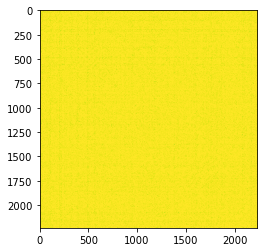

In [18]:
import matplotlib.pyplot as plt
plt.imshow(model.model.model[0].mask.detach().numpy())

In [30]:

torch.log(model.model.model[0].probs+10e-7)

tensor([[ 9.5367e-07, -2.1359e-01, -5.0948e-01,  ..., -1.0838e+00,
         -1.3829e-01, -1.2123e-02],
        [-2.1359e-01,  9.5367e-07, -6.3313e-02,  ..., -3.3511e-01,
         -8.1507e-03, -3.2749e-01],
        [-5.0948e-01, -6.3313e-02,  9.5367e-07,  ..., -1.0710e-01,
         -1.1690e-01, -6.7880e-01],
        ...,
        [-1.0838e+00, -3.3511e-01, -1.0710e-01,  ...,  9.5367e-07,
         -4.4779e-01, -1.3252e+00],
        [-1.3829e-01, -8.1507e-03, -1.1690e-01,  ..., -4.4779e-01,
          9.5367e-07, -2.3231e-01],
        [-1.2123e-02, -3.2749e-01, -6.7880e-01,  ..., -1.3252e+00,
         -2.3231e-01,  9.5367e-07]], grad_fn=<LogBackward0>)

In [20]:
crossentropy = torch.nn.CrossEntropyLoss()
loss = crossentropy(logits, batch.y)


In [32]:
a = \
    1
a

1

In [ ]:
for name, param in model.model.model.named_parameters():
    print(name)
    print(param.grad)

In [35]:
from torch.nn import Linear, ReLU, Dropout
from torch_geometric.nn import Sequential, GCNConv, JumpingKnowledge
from torch_geometric.nn import global_mean_pool




In [37]:
from collections import OrderedDict

In [38]:
model = Sequential(
        'x, edge_index',modules=OrderedDict([
            ('conv1', (GCNConv(16, 32), 'x, edge_index -> x')),
            ('conv2', (GCNConv(32, 64), 'x, edge_index -> x')),
        ]))


In [48]:
model.edge

GCNConv(16, 32)

In [45]:
Sequential(
        'x, edge_index',)

TypeError: unsupported operand type(s) for +: 'Sequential_21a592' and 'Sequential_21a592'

In [21]:
OrderedDict(list(zip(name, modules)))

OrderedDict([('a1', (GCNConv(10, 64), 'x, edge_index')),
             ('a2', (GCNConv(64, 64), 'x, edge_index'))])

In [48]:
Sequential('x, edge_index', OrderedDict(zip(name, modules)))

Sequential(
  (0): GCNConv(10, 64)
  (1): GCNConv(64, 64)
)

In [27]:
a = OrderedDict(list(zip(name, modules)))
b = OrderedDict([
            ('conv1', (GCNConv(16, 32), 'x, edge_index -> x')),
            ('conv2', (GCNConv(32, 64), 'x, edge_index -> x')),
        ])

In [28]:
a

OrderedDict([('a1', (GCNConv(10, 64), 'x, edge_index')),
             ('a2', (GCNConv(64, 64), 'x, edge_index'))])

In [45]:

model = Sequential(
    'x, edge_index', modules=OrderedDict([
        ('conv1', (GCNConv(16, 32), 'x, edge_index -> x')),
        ('conv2', (GCNConv(32, 64), 'x, edge_index -> x')),
    ]))

assert isinstance(model.conv1, GCNConv)
assert isinstance(model.conv2, GCNConv)


In [47]:
model.conv1

GCNConv(16, 32)

In [6]:
import torch_geometric
torch_geometric.__version__

'2.0.3'

In [2]:
import torch
from torch_scatter import scatter

src = torch.tensor([[1,1,1],[2,2,2],[3,4,5]])
index = torch.tensor([[0, 1]])

# Broadcasting in the first and last dim.
out = scatter(src, index, dim=0, reduce="max", dim_size=0)

print(out.size())
out

RuntimeError: The expanded size of the tensor (3) must match the existing size (2) at non-singleton dimension 1.  Target sizes: [3, 3].  Tensor sizes: [1, 2]

In [45]:
from torch_scatter import scatter

src = torch.randn(2, 6, 10)
index = torch.tensor([1, 1])

# Broadcasting in the first and last dim.
out = scatter(src, index, dim=0, reduce="max")

print(out.size())

torch.Size([2, 6, 10])


In [2]:
cfg = compose(config_name="defaults")
pl = PL_DataModule(cfg.dataloader)
batch = next(iter(pl.train_dataloader()))
# Obtain feature sizes and number of labels

cfg.model.insize = batch.x.shape[1]
cfg.model.outsize = torch.unique(batch.y).shape[0]


model_classic = Network(cfg.model)
res_cl = model_classic.loss_function(batch)


cfg = compose(config_name="defaults")
cfg.model.insize = batch.x.shape[1]
cfg.model.outsize = torch.unique(batch.y).shape[0]
cfg.model.edge_generation_type = 'DynamicEdgeConv_DGM'
model_dcg = Network(cfg.model)
res_dcg = model_dcg.loss_function(batch)

res_cl['loss'].backward()
res_dcg['loss'].backward()

# res['loss'].backward()
# for name,i in model.model.named_parameters():
#     if 'temperature' in name:
#         print(i)
    

/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this

In [6]:

import torch_cluster
from torch_geometric.nn import GCNConv
gcn = GCNConv(batch.x.shape[1], 2)
edges = torch_cluster.knn_graph(batch.x, 2, batch=None, loop=True, flow='source_to_target')
gcn(batch.x, edges)

tensor([[-2.6089e+00,  8.5865e-01],
        [-2.3051e+00, -6.2913e-03],
        [ 1.1297e+01, -1.0576e+00],
        ...,
        [ 2.1141e+00,  3.5424e+00],
        [ 4.2228e+00,  7.7990e+00],
        [ 2.3893e+00, -8.8469e+00]], grad_fn=<AddBackward0>)

In [ ]:
def weight_vector(y, preds):
    cm = confusion_matrix(y, preds)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_acc = torch.tensor(cm.diagonal())    

    y = y.view(1, -1)
    preds = preds.view(1, -1)
    class_acc = class_acc[y]

    weight_matrix = ((y == preds) * (class_acc-1) + (y != preds)*class_acc)
    return weight_matrix

y = torch.tensor(np.random.binomial(10, 0.3, 455)) 
preds = torch.tensor(np.random.binomial(10, 0.3, 455)) 

prob_L = torch.cat([model_dcg.model.model[i].edge_conv.probs.unsqueeze(0) for i in range(len(model_dcg.model.model))], dim=0)
mask_L = torch.cat([(model_dcg.model.model[i].edge_conv.mask * 1).unsqueeze(0) for i in range(len(model_dcg.model.model))], dim=0)

w_vec = weight_vector(y, preds)

weight_mask = (prob_L * mask_L) * w_vec 
negative_mask = (mask_L == 0 ) * 1
weight_mask = weight_mask + negative_mask
weight_mask = torch.prod(weight_mask, dim=1)
weight_mask.prod(dim=0).sum()



/tmp/ipykernel_1745211/2661014610.py:3: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


tensor(2.1133, dtype=torch.float64, grad_fn=<SumBackward0>)

In [2]:
import torch_cluster
from models.gcnNet import GCNnet
cfg = compose(config_name="defaults")

pl = PL_DataModule(cfg.dataloader)
batch = next(iter(pl.train_dataloader()))

cfg.model.insize = batch.x.shape[1]
cfg.model.outsize = torch.unique(batch.y).shape[0]

cfg.model.in_channels = []
cfg.model.out_channels = []
edges = torch_cluster.knn_graph(batch.x, 2, batch=None, loop=True, flow='source_to_target')
model = GCNnet(cfg.model)

In [5]:
model(batch.x, edges).shape

torch.Size([1257, 10])

In [13]:



from torch_geometric.nn import Sequential, GCNConv

In [58]:
modules = []
in_channels = [64,64]
sequential = []
for idx, values in enumerate(zip(in_channels, [64,64])):
    print(idx)
    in_feat, out_feat = values
    

    sequential.append((GCNConv(in_feat, out_feat), 'x, edge_index -> x'))

    if idx != len(in_channels) - 1:
        sequential.append(torch.nn.ReLU())
    else: pass
    
    
#model = Sequential('x, edge_index -> x', sequential)

0
1


In [223]:
def generate_matrix2(y, preds):
    cm = confusion_matrix(y, preds)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_acc = cm.diagonal()

    matrix_y = y.view(1, 1, -1).repeat((1, batch.x.shape[0], 1))
    matrix_pred = preds.view(1, 1, -1).repeat((1, batch.x.shape[0], 1))

    unique_labels = torch.unique(y).view(-1, 1, 1)
    class_acc = torch.tensor(class_acc).view(-1, 1, 1)
    
    class_acc = class_acc[matrix_y].view(1, batch.x.shape[0], batch.x.shape[0])
    #matrix_y = (matrix_y == unique_labels) * class_acc
    
    weight_matrix = ((matrix_y == matrix_pred) * (class_acc-1) + (matrix_y != matrix_pred)*class_acc)

    # matrix_pred = (matrix_pred == unique_labels) * (-1)
    # weight_matrix = (matrix_pred + matrix_y).sum(dim=0)
    return weight_matrix, matrix_y, class_acc

In [243]:
def generate_matrix2(y, preds):
    cm = confusion_matrix(y, preds)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_acc = cm.diagonal()

    matrix_y = y.view(1,-1)
    matrix_pred = preds.view(1,-1)

    unique_labels = torch.unique(y).view(-1, 1)
    class_acc = torch.tensor(class_acc).view(-1, 1)
    print(class_acc)
    #class_acc = class_acc[matrix_y].view(1,455,455)
    #matrix_y = (matrix_y == unique_labels) * class_acc
    class_acc = class_acc[matrix_y]
    weight_matrix = ((matrix_y == matrix_pred) * (class_acc-1) + (matrix_y != matrix_pred)*class_acc)

    # matrix_pred = (matrix_pred == unique_labels) * (-1)
    # weight_matrix = (matrix_pred + matrix_y).sum(dim=0)
    return weight_matrix, matrix_y, class_acc

In [1]:
import pandas as pd

datsets_csv = pd.read_csv('/home/lev/object-centric/edge-generation/configs/datasets.cvs', sep='\t', index_col=0)
    


In [5]:
'breast-cancer-wisc' in list(datsets_csv.name)

True

In [15]:
for i in list(datsets_csv.name):
    df = datsets_csv[datsets_csv.name  == i]
    break

In [17]:
df.path[0]

'/home/lev/datasets/classification_data/breast-cancer-wisc/breast-cancer-wisc_R.dat'

In [269]:
print(a[:10])
print(b[:10])

tensor([4, 6, 2, 4, 2, 1, 1, 2, 2, 4])
tensor([4, 3, 2, 6, 5, 4, 2, 4, 2, 2])


In [270]:
cm.diagonal()

array([0.        , 0.09090909, 0.29565217, 0.2519685 , 0.16666667,
       0.09756098, 0.13333333, 0.        , 0.        ])

In [271]:
1 -  0.16666667

0.83333333

In [244]:
weight_matrix, matrix_y, class_acc = generate_matrix2(a, b)

tensor([[0.0000],
        [0.0909],
        [0.2957],
        [0.2520],
        [0.1667],
        [0.0976],
        [0.1333],
        [0.0000],
        [0.0000]], dtype=torch.float64)


In [245]:
weight_matrix

tensor([[[-0.8333,  0.1667, -0.8333,  ..., -0.8333, -0.8333,  0.1667],
         [-0.8667,  0.1333, -0.8667,  ..., -0.8667, -0.8667,  0.1333],
         [-0.7043,  0.2957, -0.7043,  ..., -0.7043, -0.7043,  0.2957],
         ...,
         [-0.7043,  0.2957, -0.7043,  ..., -0.7043, -0.7043,  0.2957],
         [-0.7043,  0.2957, -0.7043,  ..., -0.7043, -0.7043,  0.2957],
         [-0.7043,  0.2957, -0.7043,  ..., -0.7043, -0.7043,  0.2957]]],
       dtype=torch.float64)

In [225]:
weight_matrix[:,:,:10]

tensor([[[-0.8333,  0.1333, -0.7043,  ...,  0.2957, -0.7043,  0.1667],
         [-0.8333,  0.1333, -0.7043,  ...,  0.2957, -0.7043,  0.1667],
         [-0.8333,  0.1333, -0.7043,  ...,  0.2957, -0.7043,  0.1667],
         ...,
         [-0.8333,  0.1333, -0.7043,  ...,  0.2957, -0.7043,  0.1667],
         [-0.8333,  0.1333, -0.7043,  ...,  0.2957, -0.7043,  0.1667],
         [-0.8333,  0.1333, -0.7043,  ...,  0.2957, -0.7043,  0.1667]]],
       dtype=torch.float64)

In [233]:
print(a[:10])
print(b[:10])

tensor([4, 6, 2, 4, 2, 1, 1, 2, 2, 4])
tensor([4, 3, 2, 6, 5, 4, 2, 4, 2, 2])


In [222]:
class_acc

tensor([[[0.1667, 0.1333, 0.2957,  ..., 0.2957, 0.2957, 0.2957],
         [0.1667, 0.1333, 0.2957,  ..., 0.2957, 0.2957, 0.2957],
         [0.1667, 0.1333, 0.2957,  ..., 0.2957, 0.2957, 0.2957],
         ...,
         [0.1667, 0.1333, 0.2957,  ..., 0.2957, 0.2957, 0.2957],
         [0.1667, 0.1333, 0.2957,  ..., 0.2957, 0.2957, 0.2957],
         [0.1667, 0.1333, 0.2957,  ..., 0.2957, 0.2957, 0.2957]]],
       dtype=torch.float64)

In [203]:
wm.shape

torch.Size([9, 455, 455])

In [187]:
generate_matrix2(a, b)[3]

tensor([[-0.7480,  0.2520, -0.7480,  ..., -0.7480, -0.7480,  0.2520],
        [-0.7480,  0.2520, -0.7480,  ..., -0.7480, -0.7480,  0.2520],
        [-0.7480,  0.2520, -0.7480,  ..., -0.7480, -0.7480,  0.2520],
        ...,
        [-0.7480,  0.2520, -0.7480,  ..., -0.7480, -0.7480,  0.2520],
        [-0.7480,  0.2520, -0.7480,  ..., -0.7480, -0.7480,  0.2520],
        [-0.7480,  0.2520, -0.7480,  ..., -0.7480, -0.7480,  0.2520]],
       dtype=torch.float64)

In [84]:
def generate_mask(y, preds):
    
    cm = confusion_matrix(y, preds)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    class_acc = cm.diagonal()
    print(class_acc)

    class_mask = y.unsqueeze(0).repeat((batch.x.shape[0],1))
    pred_mask = preds.unsqueeze(0).repeat((batch.x.shape[0],1)) 
    final_mask = torch.zeros((batch.x.shape[0], batch.x.shape[0]))
    for cl in range(len(class_acc)):
        class_mask_temp = (class_mask == cl) * class_acc[cl]
        pred_mask_temp = (pred_mask == cl) * (-1)
        final_mask += class_mask_temp + pred_mask_temp
    return final_mask

    

In [179]:
generate_matrix2(a, b)

tensor([[-7.9639,  1.0361, -7.9639,  ..., -7.9639, -7.9639,  1.0361],
        [-7.9639,  1.0361, -7.9639,  ..., -7.9639, -7.9639,  1.0361],
        [-7.9639,  1.0361, -7.9639,  ..., -7.9639, -7.9639,  1.0361],
        ...,
        [-7.9639,  1.0361, -7.9639,  ..., -7.9639, -7.9639,  1.0361],
        [-7.9639,  1.0361, -7.9639,  ..., -7.9639, -7.9639,  1.0361],
        [-7.9639,  1.0361, -7.9639,  ..., -7.9639, -7.9639,  1.0361]],
       dtype=torch.float64)

In [178]:
a = torch.tensor(np.random.binomial(10, 0.3, 455)) #torch.bernoulli(torch.ones(455)-0.5)
b = torch.tensor(np.random.binomial(10, 0.3, 455)) #torch.bernoulli(torch.ones(455)-0.5)
generate_mask(a, b)

[0.         0.09090909 0.29565217 0.2519685  0.16666667 0.09756098
 0.13333333 0.         0.        ]


tensor([[-0.8333, -0.8667, -0.7043,  ..., -0.7043, -0.7043, -0.7043],
        [-0.8333, -0.8667, -0.7043,  ..., -0.7043, -0.7043, -0.7043],
        [-0.8333, -0.8667, -0.7043,  ..., -0.7043, -0.7043, -0.7043],
        ...,
        [-0.8333, -0.8667, -0.7043,  ..., -0.7043, -0.7043, -0.7043],
        [-0.8333, -0.8667, -0.7043,  ..., -0.7043, -0.7043, -0.7043],
        [-0.8333, -0.8667, -0.7043,  ..., -0.7043, -0.7043, -0.7043]])

In [173]:
print(a[:10])
print(b[:10])

tensor([2, 3, 3, 2, 3, 3, 2, 3, 3, 5])
tensor([5, 3, 3, 5, 3, 2, 2, 6, 4, 3])


array([2, 5, 3, 3, 4, 3, 5, 1, 1, 1, 7, 7, 2, 3, 2, 8, 3, 3, 3, 4, 2, 3,
       5, 2, 3, 0, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 3, 1, 6, 4, 2,
       2, 1, 4, 0, 2, 0, 4, 3, 3, 5, 7, 2, 3, 3, 1, 5, 4, 6, 4, 1, 3, 2,
       1, 1, 4, 3, 1, 3, 4, 2, 1, 4, 6, 2, 5, 3, 2, 6, 6, 2, 5, 3, 4, 3,
       4, 2, 5, 2, 7, 2, 6, 4, 4, 2, 2, 5, 3, 5, 2, 3, 4, 1, 3, 5, 4, 1,
       5, 2, 3, 1, 2, 3, 3, 3, 5, 3, 3, 3, 3, 4, 4, 5, 2, 5, 4, 5, 3, 5,
       3, 3, 0, 3, 1, 2, 2, 1, 5, 2, 5, 2, 2, 4, 2, 2, 1, 5, 3, 4, 3, 1,
       2, 8, 3, 2, 3, 2, 3, 1, 4, 4, 2, 3, 3, 7, 3, 7, 2, 3, 2, 2, 3, 4,
       2, 3, 2, 3, 4, 3, 4, 3, 2, 2, 1, 3, 5, 2, 1, 1, 2, 3, 4, 4, 3, 2,
       2, 4, 2, 1, 4, 0, 3, 2, 1, 2, 2, 4, 3, 9, 2, 4, 3, 1, 2, 3, 4, 2,
       4, 2, 2, 2, 3, 3, 4, 4, 2, 3, 5, 3, 3, 4, 2, 6, 4, 6, 2, 4, 4, 1,
       4, 4, 2, 1, 1, 4, 3, 4, 4, 3, 3, 3, 3, 7, 1, 5, 1, 1, 4, 3, 4, 4,
       4, 4, 1, 2, 2, 5, 3, 9, 1, 1, 4, 1, 4, 3, 3, 1, 2, 1, 4, 3, 3, 4,
       2, 3, 2, 1, 2, 4, 2, 3, 3, 2, 4, 5, 1, 1, 4,

In [5]:
probs = model_dcg.model.model[-1].edge_conv.probs
mask = model_dcg.model.model[-1].edge_conv.mask*1


In [21]:
mask[model_dcg.model.model[-1].edge_conv.edge_index[0],model_dcg.model.model[-1].edge_conv.edge_index[1]].shape

torch.Size([910])

In [28]:
mask.sum(dim=0)


tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [36]:
mask

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [7]:
from sklearn.metrics import confusion_matrix

import numpy as np

y_true = [0, 1, 2, 2, 2]

y_pred = [0, 0, 2, 2, 1]





cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

#array([1.        , 0.        , 0.66666667])

array([1.        , 0.        , 0.66666667])

In [ ]:
# for name,i in model_classic.model.named_parameters():
#     if i.grad is not None:
#         shape = i.grad.shape
#     else:
#         shape='None'
    
#     print(f"name={name}, shape = {shape}")

    
    

name=model.0.edge_conv.mlp.0.weight, shape = torch.Size([2, 60])
name=model.0.edge_conv.mlp.0.bias, shape = torch.Size([2])
name=model.0.edge_conv.mlp.2.weight, shape = torch.Size([2, 2])
name=model.0.edge_conv.mlp.2.bias, shape = torch.Size([2])
name=model.1.edge_conv.mlp.0.weight, shape = torch.Size([2, 4])
name=model.1.edge_conv.mlp.0.bias, shape = torch.Size([2])
name=model.1.edge_conv.mlp.2.weight, shape = torch.Size([2, 2])
name=model.1.edge_conv.mlp.2.bias, shape = torch.Size([2])


In [5]:
for name,i in model_dcg.model.named_parameters():
    if i.grad is not None:
        shape = i.grad.shape
    else:
        shape='None'
    
    print(f"name={name}, shape = {shape}")
    if "temperature" in name:
        print(f"name={name}, shape = {i.grad}")

name=model.0.edge_conv.temperature, shape = torch.Size([1])
name=model.0.edge_conv.temperature, shape = tensor([18.3348])
name=model.0.edge_conv.mlp.0.weight, shape = torch.Size([2, 60])
name=model.0.edge_conv.mlp.0.bias, shape = torch.Size([2])
name=model.0.edge_conv.mlp.2.weight, shape = torch.Size([2, 2])
name=model.0.edge_conv.mlp.2.bias, shape = torch.Size([2])
name=model.0.edge_conv.mlp_t.0.weight, shape = torch.Size([30, 30])
name=model.0.edge_conv.mlp_t.0.bias, shape = torch.Size([30])
name=model.1.edge_conv.temperature, shape = torch.Size([1])
name=model.1.edge_conv.temperature, shape = tensor([-2186.8000])
name=model.1.edge_conv.mlp.0.weight, shape = torch.Size([2, 4])
name=model.1.edge_conv.mlp.0.bias, shape = torch.Size([2])
name=model.1.edge_conv.mlp.2.weight, shape = torch.Size([2, 2])
name=model.1.edge_conv.mlp.2.bias, shape = torch.Size([2])
name=model.1.edge_conv.mlp_t.0.weight, shape = torch.Size([2, 2])
name=model.1.edge_conv.mlp_t.0.bias, shape = torch.Size([2])


In [55]:
import torch
import torch_cluster
from torch_geometric.nn import MessagePassing
from torch.nn import Sequential as Seq, Linear, ReLU

class EdgeConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='mean') #  "Max" aggregation.
        self.mlp = Seq(Linear(2 * in_channels, out_channels),
                       ReLU(),
                       Linear(out_channels, out_channels))

        # self.mlp_k0 = Seq(Linear(in_channels, out_channels),
        #                ReLU(),
        #                Linear(out_channels, out_channels))

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]
        
        return self.propagate(edge_index, x=x)

    def message(self, x_i, x_j):
        # x_i has shape [E, in_channels]
        # x_j has shape [E, in_channels] 
        # Workout the case when k=0, hence one node
        # if torch.all(x_j == x_i):
        #     return self.mlp_k0(x_i)

        tmp = torch.cat([x_i, x_j - x_i], dim=1)  # tmp has shape [E, 2 * in_channels]
        return self.mlp(tmp)


ec = EdgeConv(10,1)

a = torch.ones(10,10)*13
edge_index = torch.Tensor([[0,1,2,3,4,5,6,7,8,9], [0,1,2,3,4,5,6,7,8,9]]).to(torch.long)
res = ec(a, edge_index)
torch.sum(torch.ones(res.shape) - res).backward()

for name,i in ec.named_parameters():
    print(name)
    print(i.requires_grad)
    print(i.grad)

mlp.0.weight
True
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
mlp.0.bias
True
tensor([0.])
mlp.2.weight
True
tensor([[0.]])
mlp.2.bias
True
tensor([-10.])


torch.Size([10, 1])

In [3]:
def check(model):
    for i in range(len(model.model.model)):
        print('i', i)
        nodes = model.model.model[i].edge_conv.edge_index
        print(nodes.shape)
        print("k_degree", model.model.model[i].edge_conv.k_degree)
        print(torch.unique(nodes[0]).shape)
        print(torch.unique(nodes[1]).shape)


check(model_classic)
print('------')
check(model_dcg)

i 0
torch.Size([2, 455])
k_degree 0
torch.Size([455])
torch.Size([455])
i 1
torch.Size([2, 455])
k_degree 1
torch.Size([323])
torch.Size([455])
i 2
torch.Size([2, 910])
k_degree 2
torch.Size([423])
torch.Size([455])
i 3
torch.Size([2, 1365])
k_degree 3
torch.Size([441])
torch.Size([455])
i 4
torch.Size([2, 1820])
k_degree 4
torch.Size([447])
torch.Size([455])
------
i 0
torch.Size([2, 455])
k_degree 1
torch.Size([419])
torch.Size([455])
i 1
torch.Size([2, 455])
k_degree 1
torch.Size([313])
torch.Size([455])
i 2
torch.Size([2, 910])
k_degree 2
torch.Size([399])
torch.Size([455])
i 3
torch.Size([2, 1365])
k_degree 3
torch.Size([424])
torch.Size([455])
i 4
torch.Size([2, 1820])
k_degree 4
torch.Size([446])
torch.Size([455])


In [5]:
res_dcg

{'loss': tensor(0.6780, grad_fn=<NllLossBackward0>),
 'accuracy': tensor(0.6286),
 'f1': 0.7719298245614035,
 'avr_precision': tensor(0.3953),
 'aucroc': tensor(0.2922),
 'temperatue_0': tensor([1.]),
 'temperatue_1': tensor([1.]),
 'temperatue_2': tensor([1.]),
 'temperatue_3': tensor([1.]),
 'temperatue_4': tensor([1.])}

tensor([-20079384.])
tensor([-0.1329])
None
None


/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272068185/work/build/aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [13]:
torch.Tensor([0.2233123123123121])[0]

tensor(0.2233)

In [4]:
idx = 3
a = model_dcg.model.model[idx].edge_conv.edge_index[:, torch.argsort(model_dcg.model.model[idx].edge_conv.edge_index[1])]
a[:,:10]

tensor([[330, 282,   0, 223, 128,   1,   2,  45,  78,   3],
        [  0,   0,   0,   1,   1,   1,   2,   2,   2,   3]])

In [5]:
model_dcg.model.model[idx].edge_conv.probs

tensor([[1.0000e+00, 1.0000e-06, 1.0000e-06,  ..., 1.0000e-06, 1.0000e-06,
         1.0000e-06],
        [1.0000e-06, 1.0000e+00, 1.0000e-06,  ..., 1.0000e-06, 1.0000e-06,
         1.0000e-06],
        [1.0000e-06, 1.0000e-06, 1.0000e+00,  ..., 1.0000e-06, 1.0000e-06,
         1.0000e-06],
        ...,
        [1.0000e-06, 1.0000e-06, 1.0000e-06,  ..., 1.0000e+00, 1.0000e-06,
         1.0000e-06],
        [1.0000e-06, 1.0000e-06, 1.0000e-06,  ..., 1.0000e-06, 1.0000e+00,
         1.0000e-06],
        [1.0000e-06, 1.0000e-06, 1.0000e-06,  ..., 1.0000e-06, 1.0000e-06,
         1.0000e+00]], grad_fn=<AddBackward0>)

AttributeError: 'DynamicEdgeConv_DCG' object has no attribute 'e'

In [4]:
model_dcg.model.model[0].edge_conv.temperature

Parameter containing:
tensor([1.], requires_grad=True)

In [6]:
nodes_emb = model_dcg.model.model[idx].edge_conv.nodes_emb

In [7]:
torch.exp(-1 * torch.sum(nodes_emb - nodes_emb.unsqueeze(1), dim=-1)**2)

tensor([[1.0000e+00, 0.0000e+00, 2.7640e-13,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.7640e-13, 0.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00]])

In [28]:
modules

[Sequential(
   (0): Linear(in_features=1, out_features=1, bias=True)
   (conv_1): Linear(in_features=1, out_features=1, bias=True)
 ),
 Sequential(
   (0): Linear(in_features=1, out_features=1, bias=True)
   (conv_1): Linear(in_features=1, out_features=1, bias=True)
 )]

In [1]:
import torch
def gumbel_sigmoid_adj(logits, tau: float = 1, hard: bool = True):
    gumbels = (
        -torch.empty_like(
            logits,
            memory_format=torch.legacy_contiguous_format
            ).exponential_().log() # ~Gumbel(0,1)
        )
    gumbels = (logits + gumbels) / tau  
    y_soft = gumbels.sigmoid()

    if hard:
        y_hard = (y_soft>=0.5)*1
        
        ret = y_hard - y_soft.detach() + y_soft
    else:
        ret = y_soft
    return ret
from torch.nn import Linear, ReLU
from torch_geometric.nn import Sequential, GCNConv
# For each node (row) the gumbles predicted edges

P = torch.randn((5, 5), requires_grad=True)
P = gumbel_sigmoid_adj(P)

# Get parent child list
childer = torch.arange(P.shape[0]).repeat(P.shape[1])
parents = torch.arange(P.shape[0]).view(-1,1).repeat((1,P.shape[1])).flatten()
edge_list = torch.stack([childer, parents])

# Get weight sequence of 0, 1 for edge_list
edge_weights = torch.clamp((P + P.T), min=0 , max=1).view((1, -1))


in_channels = 10
X = torch.randn((5, in_channels))



In [2]:
from models.GCNConvEdgeGeneration import GCNConvEG

X = torch.randn((5, in_channels))
mod = GCNConvEG(10, 2)

mod(X)
mod.edge_weight

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.], grad_fn=<ViewBackward0>)

In [5]:
mod.mask

AttributeError: 'GCNConvEG' object has no attribute 'mask'

In [6]:
from torch_geometric.nn import Sequential

In [13]:
modules=[(GCNConvEG(10, 2), 'x -> x'),
         (GCNConvEG(2, 2), 'x -> x')]
Sequential("x, edge_idx", modules=modules)

SyntaxError: positional argument follows keyword argument (3512954444.py, line 3)

In [11]:
gcn = GCNConv(in_channels, 64)
gcn(x=X, edge_index=edge_list, edge_weight=edge_weights.view(-1,1))

tensor([[ 0.1264,  0.2117, -0.6155, -0.4265, -0.2351,  0.1208, -0.0358,  0.4295,
          0.0596,  0.1285,  0.1707, -0.1177, -0.2546,  0.2090,  0.1794, -0.0455,
         -0.3811,  0.1849,  0.2891,  0.0058, -0.2700,  0.0728,  0.4148,  0.1254,
          0.0686, -0.1320, -0.0191, -0.4490, -0.2503,  0.1677,  0.1200, -0.1442,
          0.1850, -0.6354, -0.0380, -0.1589,  0.1511,  0.3127, -0.1178,  0.0055,
          0.1783, -0.0884,  0.0632, -0.3393,  0.1439,  0.1341, -0.0933, -0.2596,
         -0.2728,  0.3134, -0.3089,  0.3998,  0.2820,  0.0268,  0.4808, -0.0775,
          0.4293,  0.0870,  0.1823,  0.1307,  0.0302,  0.3191,  0.0171, -0.0550],
        [ 0.1425,  0.1555, -0.5161, -0.2563, -0.3930, -0.2457,  0.5380,  0.4687,
         -0.4424, -0.3822, -0.2537, -0.2363,  0.1580,  0.2691, -0.2786, -0.1399,
         -0.2464,  0.0928,  0.3816, -0.0718, -0.2972, -0.0636,  0.2920,  0.0751,
         -0.0620, -0.3401,  0.0213, -0.2689, -0.3602,  0.1014,  0.1504, -0.4950,
          0.1290,  0.0529, 

torch.Size([2, 25])